# Setup

In [51]:
from pathlib import Path

import kuzu
import networkx as nx
import pandas as pd

import graph.visualization as vis
from shared.settings import LOCAL_DIR, env

In [2]:
db_path = Path(LOCAL_DIR) / env.str("ECON_COMP_GRAPH_DB")
assert db_path.exists(), "You need to create the graph DB using dlctl first"

In [3]:
db = kuzu.Database(db_path)
conn = kuzu.Connection(db)

# Analysis

## Top 10 Dominating Economies

In [68]:
result = conn.execute(
    """
    MATCH (c:Country)
    RETURN c, c.country_name_short AS country_name_short
    ORDER BY c.con_score DESC
    LIMIT 10
    """
)

In [69]:
dom_econ_df = result.get_as_df()[["country_name_short"]]
dom_econ_df.index = pd.RangeIndex(start=1, stop=len(dom_econ_df) + 1, name="rank")
dom_econ_df

,country_name_short
rank,
1,United States of America
2,Canada
3,United Arab Emirates
4,Netherlands
5,United Kingdom
6,Belgium
7,Italy
8,Spain
9,France


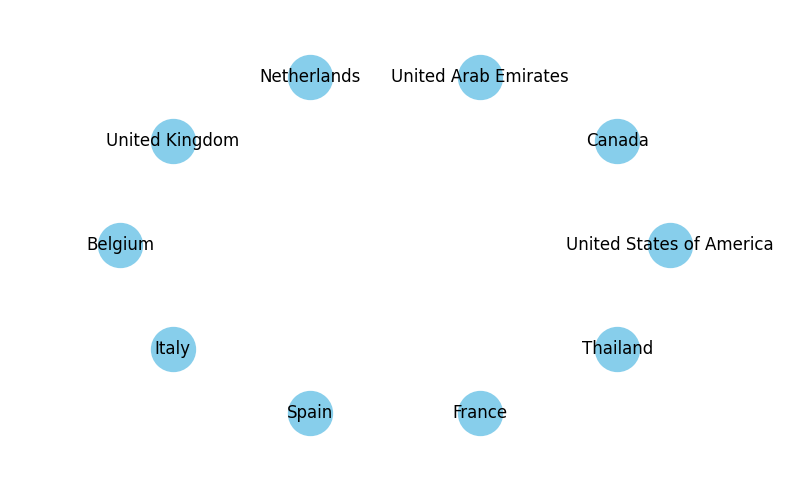

<Axes: >

In [70]:
dom_econ_g = result.get_as_networkx()
vis.plot(dom_econ_g, label="country_name_short")